# BUILDING A CLOSED LOOP TESTBED

This notebook is an executeable narrative for building a closed loop testbed.

<img src=https://github.com/joseph-hellerstein/advanced-controls-lectures/raw/main/lectures/images/simple_feedback_nofilter.png/
     width="600">

# Preliminaries

In [1]:
from controlSBML import ControlSBML

import control
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tellurium as te

# Helpers

In [2]:
s = control.TransferFunction.s
TIMES = np.linspace(0, 10, 100)

In [3]:
TEST_MODEL = """
$S1 -> S2; k1*S1
S2 -> S3; k2*S2

S1 = 10
S2 = 0
S3 = 0
k1 = 1
k2 = 2
"""
TEST_RR = te.loada(TEST_MODEL)

In [4]:
k1 = TEST_RR["k1"]
k2 = TEST_RR["k2"]
tf = k1*k2/(s*(s+k2))

In [5]:
def plotModel(model, times=TIMES, is_plot=True, title="", selections=None,
              figsize=(5,5), ylim=None, **kwargs):
    """
    Plots a model.

    Args:
       times: np.array
       kwargs: values of parameters
    Returns:
       ExtendedRoadrunner
    """
    rr = te.loada(model)
    for key, value in kwargs.items():
        rr[key] = value
    if selections is None:
        rr.simulate(times[0], times[-1], len(times))
    else:
        if not "time" in selections:
            selections.insert(0, "time")
        rr.simulate(times[0], times[-1], len(times), selections=selections)
    if is_plot:
        if ylim is None:
            rr.plot(title=title, figsize=figsize)
        else:
            rr.plot(title=title, figsize=figsize, ylim=ylim)
    return rr

# TESTS
plotModel(TEST_MODEL, k1=0.1, is_plot=False, selections=["S2"], ylim=[0, 10])
print("OK!")

OK!


# Models

## Linear

In [6]:
LINEAR_MDL = """
model *main();
S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> S4; k3*S3

k1 = 2
k2 = 1.5
k3 = 1
S1 = 10
S2 = 0
S3 = 0
S4 = 0
end
"""
_ = te.loada(LINEAR_MDL)
print("OK!")

OK!


## Wolf

In [7]:
WOLF_MODEL = """
// Created by libAntimony v2.13.2
model *Wolf2000_Glycolytic_Oscillations()

  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;

  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;

  // Species initializations:
  s1 = 1;
  at_ = 2;
  s2 = 5;
  s3 = 0.6;
  na = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  k0 = 50;
  k0 has mM_min_1;
  k1 = 550;
  k1 has mM_1_min_1;
  k2 = 9.8;
  k2 has min_1;
  k31 = 323.8;
  k31 has mM_1_min_1;
  k33 = 57823.1;
  k33 has mM_1_min_1;
  k32 = 76411.1;
  k32 has mM_1_min_1;
  k34 = 23.7;
  k34 has mM_1_min_1;
  k4 = 80;
  k4 has mM_1_min_1;
  k5 = 9.7;
  k5 has min_1;
  k6 = 2000;
  k6 has mM_1_min_1;
  k7 = 28;
  k7 has min_1;
  k8 = 85.7;
  k8 has mM_1_min_1;
  k9 = 80;
  k9 has min_1;
  k10 = 375;
  k10 has min_1;
  atot = 4;
  atot has mM;
  ntot = 1;
  ntot has mM;
  n = 4;
  n has dimensionless;
  ki = 1;
  ki has mM;

  // Other declarations:
  const compartment_, k0, k1, k2, k31, k33, k32, k34, k4, k5, k6, k7, k8;
  const k9, k10, atot, ntot, n, ki;

  // Unit definitions:
  unit substance = 1e-3 mole;
  unit time_unit = 60 second;
  unit mM = 1e-3 mole / litre;
  unit mM_min_1 = 1e-3 mole / (litre * 60 second);
  unit min_1 = 1 / 60 second;
  unit mM_1_min_1 = litre / (1e-3 mole * 60 second);

  // Display Names:
  substance is "milli mole";
  time_unit is "min";
  compartment_ is "compartment";
  s1 is "Glucose";
  at_ is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  na is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";

  // CV terms:
  s1 identity "http://identifiers.org/obo.chebi/CHEBI:17234",
              "http://identifiers.org/kegg.compound/C00293"
  at_ identity "http://identifiers.org/obo.chebi/CHEBI:15422",
               "http://identifiers.org/kegg.compound/C00002"
  s2 identity "http://identifiers.org/obo.chebi/CHEBI:16905",
              "http://identifiers.org/kegg.compound/C05378"
  s3 part "http://identifiers.org/obo.chebi/CHEBI:16108",
          "http://identifiers.org/obo.chebi/CHEBI:29052",
          "http://identifiers.org/kegg.compound/C00111",
          "http://identifiers.org/kegg.compound/C00118"
  na identity "http://identifiers.org/obo.chebi/CHEBI:15846",
              "http://identifiers.org/kegg.compound/C00003"
  s4 identity "http://identifiers.org/obo.chebi/CHEBI:17794",
              "http://identifiers.org/kegg.compound/C00197"
  s5 identity "http://identifiers.org/kegg.compound/C00022",
              "http://identifiers.org/chebi/CHEBI:32816"
  s5 identity "http://identifiers.org/obo.chebi/CHEBI:15361"
  s6 identity "http://identifiers.org/obo.chebi/CHEBI:15343",
              "http://identifiers.org/kegg.compound/C00084"
  s6o identity "http://identifiers.org/obo.chebi/CHEBI:15343",
               "http://identifiers.org/kegg.compound/C00084"
  v1 part "http://identifiers.org/kegg.reaction/R00756",
          "http://identifiers.org/kegg.reaction/R00299"
  v1 part "http://identifiers.org/ec-code/2.7.1.11",
          "http://identifiers.org/ec-code/5.3.1.9"
  v2 identity "http://identifiers.org/ec-code/4.1.2.13",
              "http://identifiers.org/kegg.reaction/R01070"
  v3 part "http://identifiers.org/ec-code/2.7.2.3",
          "http://identifiers.org/ec-code/1.2.1.12"
  v4 part "http://identifiers.org/kegg.reaction/R00658",
          "http://identifiers.org/kegg.reaction/R00200"
  v4 part "http://identifiers.org/ec-code/2.7.1.40"
  v5 hypernym "http://identifiers.org/ec-code/4.1.1.1",
              "http://identifiers.org/kegg.reaction/R00224"
  v7 hypernym "http://identifiers.org/obo.go/GO:0006754"
  v8 part "http://identifiers.org/kegg.reaction/R05679"
  v9 hypernym "http://identifiers.org/obo.go/GO:0046187"
  v6 hypernym "http://identifiers.org/ec-code/1.1.1.71",
              "http://identifiers.org/kegg.reaction/R00754"
  v0 hypernym "http://identifiers.org/obo.go/GO:0046323"


end

Wolf2000_Glycolytic_Oscillations is "Wolf2000_Glycolytic_Oscillations"

Wolf2000_Glycolytic_Oscillations model_entity_is "http://identifiers.org/biomodels.db/MODEL3352181362"
Wolf2000_Glycolytic_Oscillations model_entity_is "http://identifiers.org/biomodels.db/BIOMD0000000206"
Wolf2000_Glycolytic_Oscillations description "http://identifiers.org/pubmed/10692304"
Wolf2000_Glycolytic_Oscillations taxon "http://identifiers.org/taxonomy/4932"
Wolf2000_Glycolytic_Oscillations hypernym "http://identifiers.org/obo.go/GO:0006096"
Wolf2000_Glycolytic_Oscillations identity "http://identifiers.org/kegg.pathway/sce00010"


"""

# Coding the Closed Loop

<img src=https://github.com/joseph-hellerstein/advanced-controls-lectures/raw/main/lectures/images/simple_feedback_nofilter.png/
     width="600">

In [8]:
OLS = """
S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> S4; k3*S3

k1 = 2
k2 = 1.5
k3 = 1
S1 = 10
S2 = 0
S3 = 0
S4 = 0
"""

Open loop system?
1. Input: 
1. Output:

Closed loop system?
1. Input:
1. Output: 
1. Controller parameters:

How do we augment the Antimony code to create a PI controller?
1. Antimony parameters for $k_P$, $k_I$, setpoint
1. Calculate control error
1. Calculate integral control error
1. Calculate OLS input

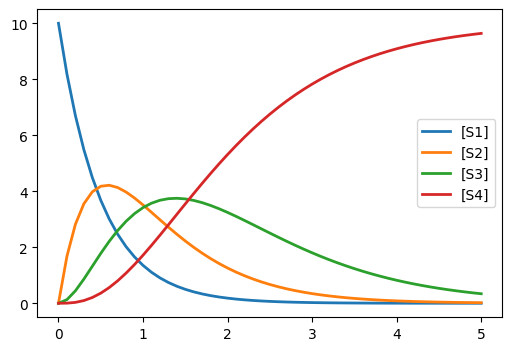

In [9]:
CLS = """
// Start with the OLS
S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> S4; k3*S3

k1 = 2
k2 = 1.5
k3 = 1
S1 = 10
S2 = 0
S3 = 0
S4 = 0

// Parameters in CLS


// Controller

"""
rr = te.loada(CLS)
rr.simulate()
rr.plot()

# Generalizing the Closed Loop Code

The foregoing code works for a specific OLS. We want to generalize the implementation so that works *any* OLS represented as an Antimony model. This means considering:
1. The name of the input species.
1. The name of the output species.
1. The sign of the directional effect of the OLS input species on the OLS output species.
1. The antimony model.

Items (1)-(3) mean customizing the Antimony code that is added. So, instead of inserting the names of the input and output.

In [10]:
# Generalizing the code for the controller implementation
input_name = "S1"
output_name = "S4"
sign = 1
CONTROL_LOGIC = """

    #vvvv start control logic
    setpoint = 1
    kP = 1
    kI = 0

    const %s  # input_name
    control_error := %d*(setpoint - %s)  # sign, output_name
    integral_control_error = 0
    integral_control_error' = control_error
    $%s := kP*control_error + kI*integral_control_error  # input_name


    #^^^^ end control logic
""" 
print(CONTROL_LOGIC % (input_name, sign, output_name, input_name))



    #vvvv start control logic
    setpoint = 1
    kP = 1
    kI = 0

    const S1  # input_name
    control_error := 1*(setpoint - S4)  # sign, output_name
    integral_control_error = 0
    integral_control_error' = control_error
    $S1 := kP*control_error + kI*integral_control_error  # input_name


    #^^^^ end control logic



In LINEAR_MDL, this logic goes at the end. However, WOLF_MDL is a *modular model* that is scoped by ``model`` and ``end`` statements.

In [11]:
model = WOLF_MODEL
end_pos = model.index("end")
model_front = model[:end_pos]
model_back = model[end_pos:]
control_logic = CONTROL_LOGIC % (input_name, sign, output_name, input_name)
print(model_front + control_logic + model_back)


// Created by libAntimony v2.13.2
model *Wolf2000_Glycolytic_Oscillations()

  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;

  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;

  // Species initializations:
  s1 = 1;
  at_ = 2;


# Testbed Builder

Function that adds PI control to an Antimony model that is the OLS.

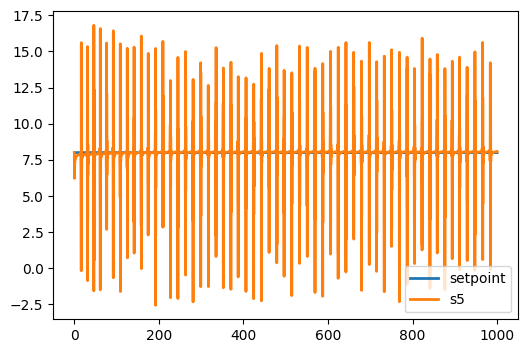

OK!


In [12]:
def buildPITestbed(model, input_name, output_name, sign=1):
    """
    Creates an Antimony model of a PI controller using model as the open loop system.
    The resulting model as Antimony parameters for the setpoint, kP, kI. Assumes that
    this is a modular model (has an "end" statement).
    
    Args:
        model: str (Antimony model of OLS)
        input_name: str (name of a species in the OLS)
        output_name: str (name of a species in the OLS)
        sign: int (directional effect of input on output)
        
    Returns:
        str (Antimony model)
    """
    # Partition the model
    try:
        end_pos = model.index("end")
    except:
        end_pos = len(model) - 1
    model_front = model[:end_pos]
    model_back = model[end_pos:]
    control_logic = CONTROL_LOGIC % (input_name, sign, output_name, input_name)
    return model_front + control_logic + model_back
    
# TESTS
is_plot = True
control_model = buildPITestbed(WOLF_MODEL, "at_", "s5")
rr = te.loada(control_model)
rr["kP"] = 0.01
rr["kI"] = 0.0001
rr["setpoint"] = 8
rr.simulate(0, 1000, 10000, selections=["time", "setpoint", "s5"])
if is_plot:
    rr.plot()
control_model = buildPITestbed(TEST_MODEL, "S1", "S2")
print("OK!")

This step designs a closed loop system that achieves our control objectives.

# Running Testbed Experiments

Using the Testbed involves two steps.
1. Create the Antimony model for the closed loop system via ``buildPITestbed``.
1. Run the model for desired values of ``setpoint``, ``kP``, and ``kI``.

## Proportional Control

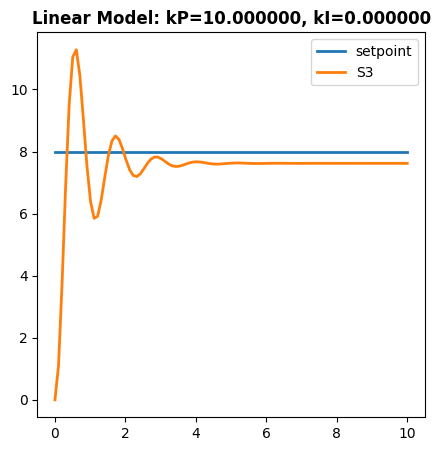

<roadrunner.RoadRunner() { this = 0x60000322ea40 }>

In [13]:
kP = 10
kI = 0
CL_LINEAR_MDL = buildPITestbed(LINEAR_MDL, "S1", "S3")
plotModel(CL_LINEAR_MDL, title="Linear Model: kP=%f, kI=%f" % (kP, kI), selections=["setpoint", "S3"],
     kP=kP, setpoint=8)


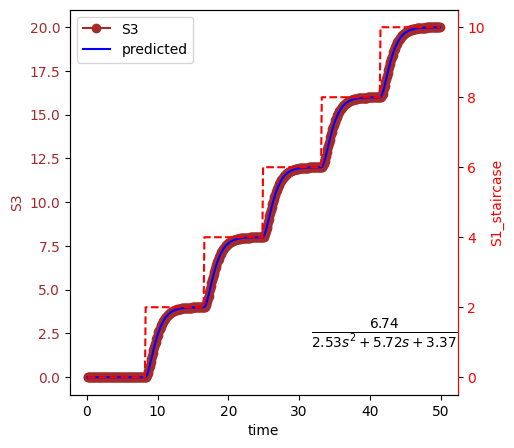

In [14]:
ctlsb = ControlSBML(LINEAR_MDL, input_names=["S1"], output_names=["S3"])
_ = ctlsb.plotTransferFunctionFit(times=np.linspace(0, 50, 500))

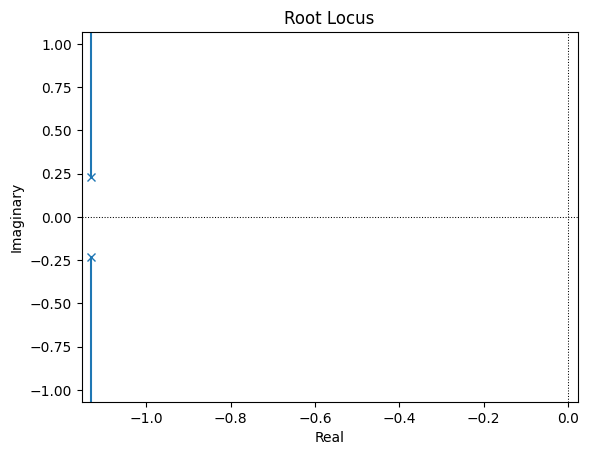

In [15]:
tf = 6.74/(2.53*s**2 + 5.72*s + 3.37)
_ = control.root_locus(tf, grid=False)

Where are we on the root locus plot? What does it tell us in terms of increasing $k_I$?

## Integral Control

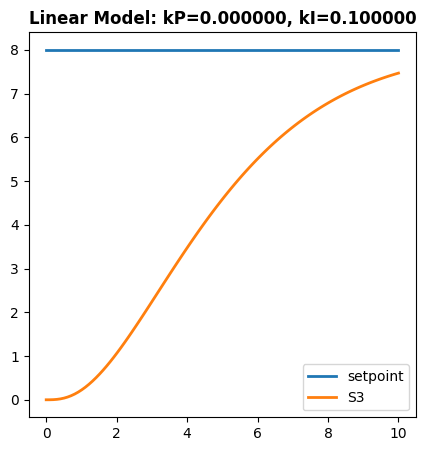

<roadrunner.RoadRunner() { this = 0x6000032383c0 }>

In [16]:
kP = 0
kI = 0.1
plotModel(CL_LINEAR_MDL, title="Linear Model: kP=%f, kI=%f" % (kP, kI), selections=["setpoint", "S3"],
     kP=kP, kI=kI, setpoint=8)


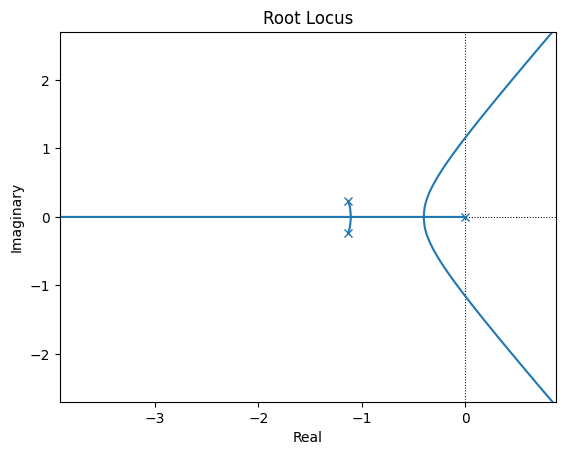

In [17]:
tf = 6.74/(s*(2.53*s**2 + 5.72*s + 3.37))
_ = control.root_locus(tf, grid=False)

Where are we on the root locus plot? What does it tell us in terms of increasing $k_I$?

# Alternative Control Logic

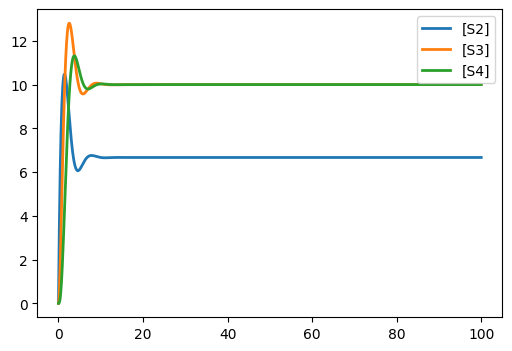

In [18]:
CONTROL_LINEAR_MDL2 = """
// Start with the OLS
S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> S4; k3*S3
S4 ->; k4*S4

k1 = 2
k2 = 1.5
k3 = 1
k4 = 1
S1 = 10
S2 = 0
S3 = 0
S4 = 0

# Add a cascade
const S1
S2 -> ; kc1*S4
kc1 = 1


"""
rr = te.loada(CONTROL_LINEAR_MDL2)
rr.simulate(0, 100, 1000)
rr.plot()